# Práctico 3: Regresión

## Objetivos del trabajo

* Objetivo general:
    - introducir la técnica de regresión

* Objetivos específicos:
    - continuar el estudio del dataset de la ECH, en este caso con una variable de respuesta continua
    - aplicar herramientas de análisis estadístico descriptivo adecuadas al caso
    - aplicar la técnica de regresión
    - proponer alternativas de tratamiento de datos para resolver problemas de la aplicación de la técnica de regresión
    
    
## Presentación del caso de estudio

* Predicción del ingreso de las personas:
    - queremos desarrollar un modelo de predicción de los ingresos de las porsonas por trabajo en relación de dependencia, a partir de los datos de la ECH
    
1. Objetivo:

    * **Tarea (T)**: Predicción del ingreso de las personas por su trabajo en relación de dependencia, a partir de los datos de la ECH 
    * **Entrenamiento (E)**: Utilizamos los datos de la Encuesta Continua de Hogares del INE (ECH) de 2017        
    * **Performance (P)**: buscamos minimizar el error de predicción definido como MSE (error cuadrático medio)   


2. Links de referencia:

    * [Encuesta Continua de Hogares 2017](https://anterior.ine.gub.uy/web/guest/encuesta-continua-de-hogares1) 
    * datos a utilizar: [Bases ECH 2017 en formato sav](https://anterior.ine.gub.uy/c/document_library/get_file?uuid=e38ea53c-7253-4007-9f67-2f5f161eea91&groupId=10181)
    * [Diccionario de variables ECH 2017](https://anterior.ine.gub.uy/c/document_library/get_file?uuid=b60f247b-03cb-4bb1-b84b-5d7328479fe2&groupId=10181)
        
    
3. Entendimiento del caso:

    * Lectura de la documentación de los datos de la ECH
    * Análisis del diccionario de datos de la ECH
    * ¿Cuál es la variable objetivo *Y*?
    * Planteo inicial de hipótesis: Definición del enfoque de uso de variables (no existe receta)
        - de menos a más: variable por variable, probando una hipótesis a la vez, utilizando combinaciones
        - usar todas las variables de una vez

## Setup

* Instalación de librerías

In [5]:
#lo comentamos si ya realizamos la instalación
#pip install pyreadstat

* Importación de librerías

In [2]:
# setup
import os # Obtener directorios de trabajo 
import numpy as np
import pandas as pd
import pyreadstat
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

* Seteo de directorio de trabajo
    - facilita el trabajo con direcciones relativas al directorio elegido
    - una buena práctica es setearlo en la raíz del proyecto que estamos trabajando, luego es fácil moverse a partir de allí

In [3]:
# obtengo el directorio de trabajo actual
os.getcwd()

'/home/jovyan/work/pr_3_regresion/src'

In [4]:
# seteo y verifico el directorio de trabajo en la raíz del proyecto
os.chdir(r'/home/jovyan/work/pr_3_regresion') # se incluye 'r' antes de la dirección para atender adecuadamente a los caracteres especiales

print('El nuevo -actual- directorio de trabajo es: ', os.getcwd())

El nuevo -actual- directorio de trabajo es:  /home/jovyan/work/pr_3_regresion


## Adquisición de los datos

* para este caso, por ser de una sola vez, se realiza la descarga y guardado manual de los datos

In [6]:
# import data
dfP2017 = pd.read_spss(r'data/Base ECH 2017 formato SAV/P_2017_Terceros.sav')

In [7]:
columns = dfP2017.columns.values.tolist()
print(columns)

['numero', 'nper', 'anio', 'mes', 'dpto', 'nomdpto', 'secc', 'segm', 'loc_agr_13', 'nom_loc_agr_13', 'ccz', 'barrio', 'nombarrio', 'estred13', 'region_3', 'region_4', 'pesoano', 'pesosem', 'pesotri', 'pesomen', 'e557', 'e558', 'e26', 'e27', 'e29_1', 'e29_2', 'e29_3', 'e29_4', 'e29_5', 'e29_5_1', 'e29_6', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e185', 'e186_1', 'e186_2', 'e186_3', 'e186_4', 'e37', 'e37_2', 'e234_2', 'e38', 'e38_1', 'e39', 'e39_2', 'e235_2', 'e236', 'e236_2', 'e236_4', 'e45_1', 'e45_1_1', 'e45_1_1_1', 'e45_1_2', 'e45_1_2_1', 'e45_2', 'e45_2_1', 'e45_2_1_1', 'e45_2_2', 'e45_2_2_1', 'e45_3', 'e45_3_1', 'e45_3_1_1', 'e45_3_2', 'e45_3_2_1', 'e45_4', 'e45_4_1', 'e45_4_2', 'e45_4_3', 'e45_4_3_1', 'e45_5', 'e45_5_1', 'e45_5_1_1', 'e45_6', 'e45_7', 'e45_7_1', 'e237', 'e46', 'e47', 'e47_1', 'e190', 'e190_1', 'e190_1_1', 'e190_2', 'e190_2_1', 'e190_3', 'e190_3_1', 'e191', 'e192', 'e48', 'e49', 'e238', 'e239', 'e240_1', 'e240_2', 'e241', 'e242', 'e242_1', 'e193', 'e194', 

In [8]:
dfP2017.head()

,numero,nper,anio,mes,dpto,nomdpto,secc,segm,loc_agr_13,nom_loc_agr_13,...,indaceliac,indatuberc,indaoncolo,indasida,indaucc,PT1,PT2,PT4,pobre06,indigente06
0,2017000001,1.0,2017,Enero,Montevideo,MONTEVIDEO,17,006,01010,Montevideo,...,689.0,585.0,585.0,585.0,665.0,28779.0,28779.0,28779.0,0.0,0.0
1,2017000001,2.0,2017,Enero,Montevideo,MONTEVIDEO,17,006,01010,Montevideo,...,689.0,585.0,585.0,585.0,665.0,10100.0,0.0,0.0,0.0,0.0
2,2017000002,1.0,2017,Junio,Canelones,CANELONES,,,03023,"Canelones y otras (Paso Espinosa, Paso Palomeque)",...,691.0,578.0,578.0,578.0,672.0,50786.0,50786.0,50786.0,0.0,0.0
3,2017000002,2.0,2017,Junio,Canelones,CANELONES,,,03023,"Canelones y otras (Paso Espinosa, Paso Palomeque)",...,691.0,578.0,578.0,578.0,672.0,0.0,0.0,0.0,0.0,0.0
4,2017000003,1.0,2017,Febrero,Montevideo,MONTEVIDEO,24,108,01010,Montevideo,...,688.0,585.0,585.0,585.0,662.0,88000.0,0.0,0.0,0.0,0.0


In [9]:
type(dfP2017)

pandas.core.frame.DataFrame

* Observamos bajo qué tipo de dato fueron importadas las variables que por definición serían numéricas o categóricas

In [17]:
# edad
dfP2017['e27'].dtype

dtype('float64')

In [16]:
# sexo
dfP2017['e26'].dtype

CategoricalDtype(categories=['Hombre', 'Mujer'], ordered=False)

In [18]:
# categoría ocupacional
dfP2017['f73'].dtype

CategoricalDtype(categories=[                                             0.0,
                                          'Asalariado/a privado/a',
                                          'Asalariado/a público/a',
                             'Cuenta propia con local o inversión',
                            'Cuenta propia sin local ni inversión',
                  'Miembro de cooperativa de producción o trabajo',
                                 'Miembro del hogar no remunerado',
                                                        'Patrón/a',
                    'Trabajador/a de un programa social de empleo'],
, ordered=False)

# Preparación de los datos

* Copia de dataset original
    - optamos por mantener en memoria el objeto (DataFrame de pandas) original, de modo de volver a utilizarlo sin necesidad de importarlo nuevamente; esta decisión responde al proceso de trabajo y debe ser evaluada según cada caso, teniendo en cuenta el volumen de datos que se trate y los tiempos de procesamiento de las funciones utilizadas
    - para ello, debemos tomar la precaución de aplicar transformaciones sobre un nuevo objeto, copia del original

* Variables de nuestro caso de estudio
    - variable de respuesta: Se crea la variable ysos_dep como la suma de los importes monetarios recibidos el mes anterior por concepto de sueldos y jornales, comisiones y otros conceptos variables, viáticos y propinas, recibidos en relación de dependencia, tanto en su ocupación principal como en otras en relación de dependencia

* Variables categóricas (https://pandas.pydata.org/docs/user_guide/categorical.html)
    - decisión: transformamos las variables categóricas si se importan como numéricas, definiendo su tipo al incorporarlas a nuestro dataset
    - en este caso no sería necesario ya que las que son de nuestro interés se importaron como categóricas

In [83]:
df_ysos = pd.DataFrame()

# variable de respuesta
df_ysos['ysos_dep'] = dfP2017['g126_1'] + dfP2017['g126_2'] + dfP2017['g126_3'] + dfP2017['g126_4'] \
                      + dfP2017['g134_1'] + dfP2017['g134_2'] + dfP2017['g134_3'] + dfP2017['g134_4']

# atributos

## caracteristicas personales
df_ysos['edad'] = dfP2017['e27']
df_ysos['sexo'] = dfP2017['e26']

## educación
df_ysos['anios_educ'] = dfP2017['e51_2'] + dfP2017['e51_3'] + dfP2017['e51_4'] + dfP2017['e51_5'] + dfP2017['e51_6'] \
                        + dfP2017['e51_7'] + dfP2017['e51_8'] + dfP2017['e51_9'] + dfP2017['e51_10'] + dfP2017['e51_11']

## relación de empleo
df_ysos['antiguedad'] = dfP2017['f88_2']
df_ysos['categoria_ocup'] = dfP2017['f73']

df_ysos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118268 entries, 0 to 118267
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   ysos_dep        118268 non-null  float64 
 1   edad            118268 non-null  float64 
 2   sexo            118268 non-null  category
 3   anios_educ      118268 non-null  float64 
 4   antiguedad      118268 non-null  float64 
 5   categoria_ocup  118268 non-null  category
dtypes: category(2), float64(4)
memory usage: 3.8 MB


In [84]:
df_ysos.head()

,ysos_dep,edad,sexo,anios_educ,antiguedad,categoria_ocup
0,18000.0,70.0,Hombre,6.0,7.0,Asalariado/a privado/a
1,0.0,81.0,Mujer,4.0,0.0,0.0
2,48000.0,52.0,Hombre,6.0,32.0,Asalariado/a público/a
3,0.0,15.0,Hombre,15.0,0.0,0.0
4,0.0,72.0,Mujer,16.0,0.0,0.0


* Filtro de observaciones relevantes
    - tomamos la decisión de considerar exclusivamente las observaciones con valores mayores que cero de la variable de respuesta (la persona se encuentra trabajando y cobra por su trabajo)
    

In [85]:
# podemos filtrar acá: como se respeta el índice, incluso podríamos considerar luego otras variables del dataset original
df_ysos = df_ysos[df_ysos['ysos_dep'] > 0]

In [86]:
# nota: las operaciones de filtro (arrays de numpy) mantienen el vínculo índice-valor:
df_ysos.index

Int64Index([     0,      2,      5,      7,      8,     13,     15,     16,
                20,     27,
            ...
            118238, 118239, 118247, 118249, 118252, 118254, 118256, 118257,
            118261, 118262],
           dtype='int64', length=38998)

- luego de ese primer filtro observamos el comportamiento de la categoría ocupacional, y decidimos quedarnos con las categorías que se encuentran definidas en el diccionario bajo 1 ("Asalariado/a privado/a") y 2 ("Asalariado/a público/a"), tanto por su definición, como por el comportamiento observado.

categoria_ocup
0.0                                                 808
Asalariado/a privado/a                            29166
Asalariado/a público/a                             8219
Cuenta propia con local o inversión                 560
Cuenta propia sin local ni inversión                 58
Miembro de cooperativa de producción o trabajo        9
Miembro del hogar no remunerado                       1
Patrón/a                                             86
Trabajador/a de un programa social de empleo         91
Name: ysos_dep, dtype: int64
categoria_ocup
0.0                                               0.020719
Asalariado/a privado/a                            0.747885
Asalariado/a público/a                            0.210754
Cuenta propia con local o inversión               0.014360
Cuenta propia sin local ni inversión              0.001487
Miembro de cooperativa de producción o trabajo    0.000231
Miembro del hogar no remunerado                   0.000026
Patrón/a                

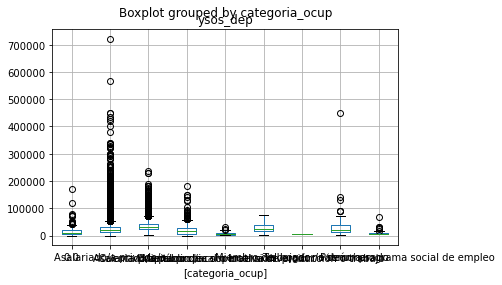

In [87]:
df_ysos.boxplot(column=['ysos_dep'], by=['categoria_ocup'])
print(df_ysos.groupby(['categoria_ocup'])['ysos_dep'].count())
print(df_ysos.groupby(['categoria_ocup'])['ysos_dep'].count()/len(df_ysos))

In [88]:
df_ysos = df_ysos.loc[(df_ysos['categoria_ocup'] == "Asalariado/a privado/a") | (df_ysos['categoria_ocup'] == "Asalariado/a público/a")]

In [89]:
df_ysos['categoria_ocup'].head()

0    Asalariado/a privado/a
2    Asalariado/a público/a
5    Asalariado/a privado/a
7    Asalariado/a privado/a
8    Asalariado/a privado/a
Name: categoria_ocup, dtype: category
Categories (9, object): [0.0, 'Asalariado/a privado/a', 'Asalariado/a público/a', 'Cuenta propia con local o inversión', ..., 'Miembro de cooperativa de producción o trabajo', 'Miembro del hogar no remunerado', 'Patrón/a', 'Trabajador/a de un programa social de empleo']

# Análisis estadístico descriptivo y transformaciones de variables

* Estructura del dataset

In [90]:
df_ysos.head()

,ysos_dep,edad,sexo,anios_educ,antiguedad,categoria_ocup
0,18000.0,70.0,Hombre,6.0,7.0,Asalariado/a privado/a
2,48000.0,52.0,Hombre,6.0,32.0,Asalariado/a público/a
5,33000.0,42.0,Mujer,16.0,0.0,Asalariado/a privado/a
7,2400.0,29.0,Mujer,8.0,1.0,Asalariado/a privado/a
8,23000.0,37.0,Hombre,6.0,4.0,Asalariado/a privado/a


In [91]:
df_ysos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37385 entries, 0 to 118262
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ysos_dep        37385 non-null  float64 
 1   edad            37385 non-null  float64 
 2   sexo            37385 non-null  category
 3   anios_educ      37385 non-null  float64 
 4   antiguedad      37385 non-null  float64 
 5   categoria_ocup  37385 non-null  category
dtypes: category(2), float64(4)
memory usage: 1.5 MB


In [92]:
df_ysos.describe()

,ysos_dep,edad,anios_educ,antiguedad
count,37385.000000,37385.000000,37385.000000,37385.000000
mean,27318.851892,40.441648,11.556079,8.576327
std,23157.617331,12.898233,4.599975,9.605859
min,43.000000,14.000000,0.000000,0.000000
25%,15000.000000,30.000000,8.000000,2.000000
50%,22000.000000,40.000000,11.000000,5.000000
75%,33000.000000,51.000000,15.000000,12.000000
max,720000.000000,91.000000,36.000000,60.000000


In [93]:
pd.isnull(df_ysos).describe()

,ysos_dep,edad,sexo,anios_educ,antiguedad,categoria_ocup
count,37385,37385,37385,37385,37385,37385
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,37385,37385,37385,37385,37385,37385


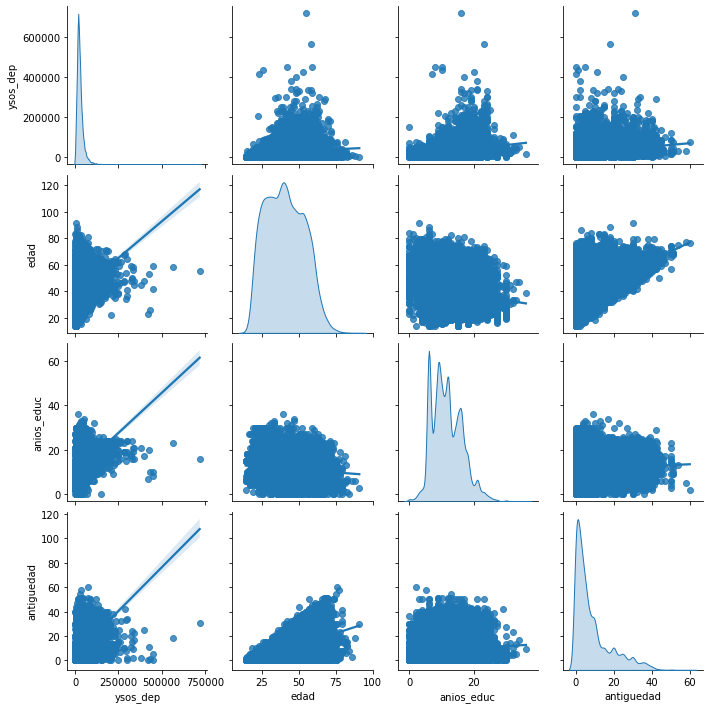

In [94]:
sns.pairplot(df_ysos, kind="reg", diag_kind="kde")

* Principales características de la variable de respuesta

    - análisis gráfico de normalidad; opción por la transformación logarítmica
        - **Tarea 2.1: investigamos qué presentan las gráficas qqplot y qué conclusiones podemos extraer acerca de la normalidad de la variable**
        - Respuesta 2.1: completar aquí

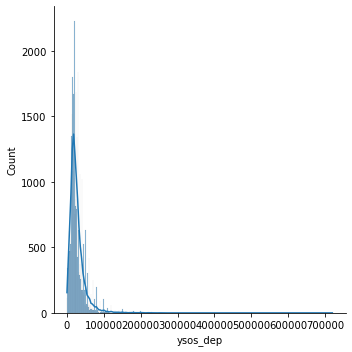

In [95]:
sns.displot(df_ysos['ysos_dep'], kde = True)

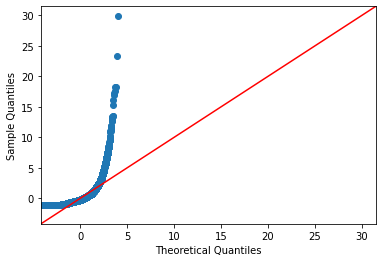

In [96]:
sm.qqplot(np.array(df_ysos['ysos_dep']), line='45', fit=True);

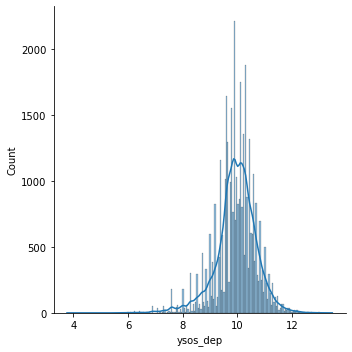

In [97]:
sns.displot(np.log(df_ysos['ysos_dep']), kde = True)

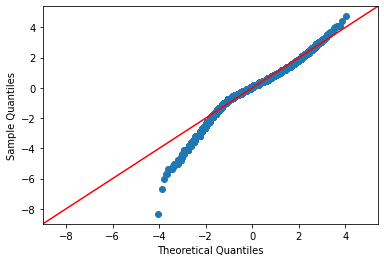

In [98]:
sm.qqplot(np.array(np.log(df_ysos['ysos_dep'])), line='45', fit=True); #punto y coma evita duplicación del gráfico

* Algunas ventajas de la transformación logarítmica
    - si en nuestro análisis asumimos normalidad de la variable de respuesta, la transformación favorece su cumplimiento
    - ayuda al cumplimiento del supuesto de varianza constante
    
    
* Desventajas de la transformación logarítmica
    - dificulta la interpretación    
    

* Defino variable de respuesta transformada y descarto variable original (defino nuevo dataset df_l_ysos)

In [101]:
df_ysos['l_ysos_dep'] = np.log(df_ysos['ysos_dep'])
df_l_ysos = df_ysos.drop(columns=['ysos_dep'])
df_l_ysos.head()

,edad,sexo,anios_educ,antiguedad,categoria_ocup,l_ysos_dep
0,70.0,Hombre,6.0,7.0,Asalariado/a privado/a,9.798127
2,52.0,Hombre,6.0,32.0,Asalariado/a público/a,10.778956
5,42.0,Mujer,16.0,0.0,Asalariado/a privado/a,10.404263
7,29.0,Mujer,8.0,1.0,Asalariado/a privado/a,7.783224
8,37.0,Hombre,6.0,4.0,Asalariado/a privado/a,10.043249


* Comportamiento de la variable de respuesta con respecto a las variables predictoras

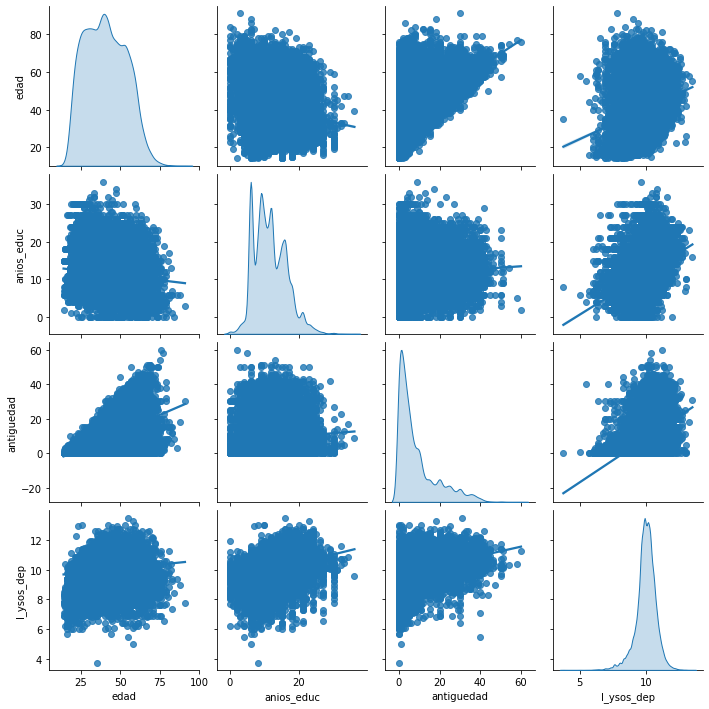

In [102]:
sns.pairplot(df_l_ysos, kind="reg", diag_kind="kde")

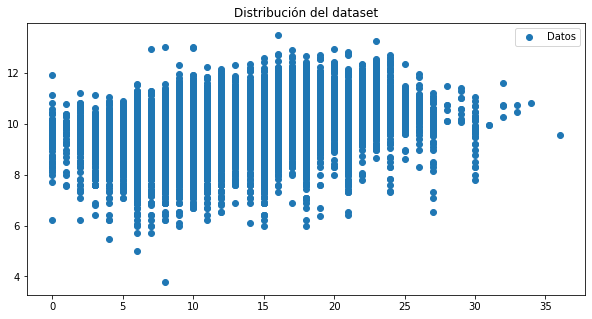

In [103]:
# plotear distribución del dataset
plt.figure(figsize=(10,5))
plt.scatter(df_l_ysos['anios_educ'], df_ysos['l_ysos_dep'], label='Datos')
plt.title('Distribución del dataset')
plt.legend()

<AxesSubplot:title={'center':'l_ysos_dep'}, xlabel='[anios_educ]'>

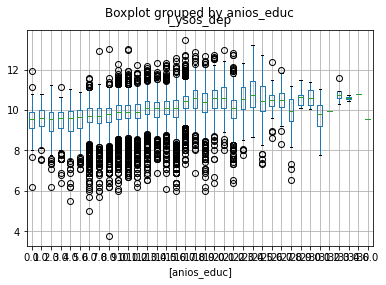

In [104]:
df_l_ysos.boxplot(column='l_ysos_dep', by=['anios_educ'])

<AxesSubplot:title={'center':'l_ysos_dep'}, xlabel='[categoria_ocup]'>

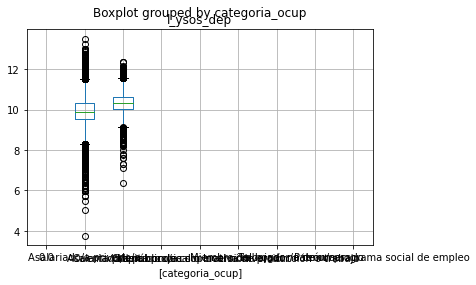

In [105]:
df_l_ysos.boxplot(column=['l_ysos_dep'], by=['categoria_ocup'])

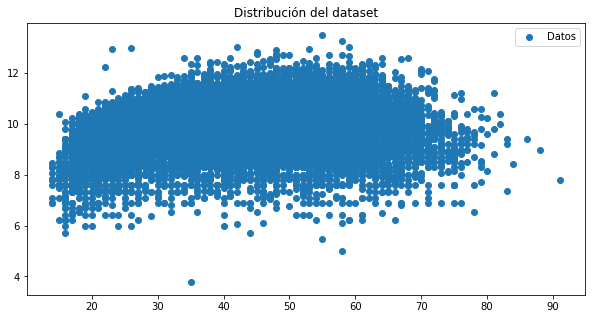

In [106]:
plt.figure(figsize=(10,5))
plt.scatter(df_l_ysos['edad'], df_l_ysos['l_ysos_dep'], label='Datos')
plt.title('Distribución del dataset')
plt.legend()

- **Tarea 2.2: completamos AED de variables predictoras, en particular sobre la correlación entre variables predictoras (buscamos métodos gráficos para ello) y sus consecuencias en la implementación de regresión**
    - Respuesta 2.2: insertar celdas a continuación

* Transformación de variables predictoras numéricas
    - **Tarea 2.3: investigamos qué es y bajo qué condiciones conviene realizar la ESTANDARIZACIÓN de variables numéricas en el contexto de regresión**
    - Respuesta 2.3: completar aquí

* Transformación de variables predictoras categóricas: One-Hot Encoding neceasario para implementar regresión
    - se debe hacer sobre el dataframe antes de la partición en Train y Test, porque cambia los índices (X, y, quedarían con índ. distintos)

In [112]:
categorical_columns = ['sexo', 'categoria_ocup']
numerical_columns = ['edad', 'anios_educ', 'antiguedad']

# función transformadora
column_transform = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns), # cuando son dos categorías, elimina una
    #(StandardScaler(), numerical_columns), # comentado mientras no se decida estandarizar
    remainder='passthrough', # deja el resto de las columnas sin transformar
    verbose_feature_names_out=False)

In [113]:
df_l_ysos_transf = pd.DataFrame(
    column_transform.fit_transform(df_l_ysos), 
    columns=column_transform.get_feature_names_out()
)

df_l_ysos_transf.head()

,sexo_Mujer,categoria_ocup_Asalariado/a público/a,edad,anios_educ,antiguedad,l_ysos_dep
0,0.0,0.0,70.0,6.0,7.0,9.798127
1,0.0,1.0,52.0,6.0,32.0,10.778956
2,1.0,0.0,42.0,16.0,0.0,10.404263
3,1.0,0.0,29.0,8.0,1.0,7.783224
4,0.0,0.0,37.0,6.0,4.0,10.043249


## Partición del dataset: Train y Test

(Fuente: Práctico 2)

En un escenario del mundo real, no sabríamos la relación entre los predictores y el resultado. Dado un conjunto de datos, nuestra tarea es encontrar modelos candidatos adecuados y elegir el que mejor se adapte a nuestra información.

Con este fin, dividimos nuestros datos en, al menos, dos conjuntos distintos:
- Conjunto de entrenamiento (train): la porción de datos que se ajusta al modelo.
- Conjunto de pruebas (test): la parte de datos para evaluar el rendimiento del modelo.
    
**Como el conjunto de prueba contiene datos no vistos antes por el modelo, la evaluación de los rendimientos en ese conjunto proporciona una mejor estimación de cómo funcionaría el modelo en datos no vistos del mundo real.**


Para la división de nuestro dataset utilizaremos la librería: **sklearn.model_selection.train_test_split()** cuyos parámetros son:
   - arrays: secuencia de indexables. Las listas, las matrices numpy, las matrices scipy-sparse y los marcos de datos de pandas son entradas válidas.
   - test_size: int o float, por defecto Ninguno. Si es flotante, debe estar entre 0,0 y 1,0 y representar el porcentaje del conjunto de datos para probar la división. Si se usa int, se refiere al número total de muestras de prueba. Si el valor es Ninguno, se utiliza el complemento del tamaño del tren. Se establecerá en 0,25 si el tamaño del tren también es Ninguno.
   - train_size: int o float, por defecto Ninguno.
   - random_state : int, por defecto Ninguno. Controla cómo se mezclan los datos antes de implementar la división. Para una salida repetible en varias llamadas a funciones, paserle un int.
   - shuffle: objeto booleano, por defecto True. Si los datos se deben mezclar o no antes de dividirlos. Estratificar debe ser Ninguno si barajar = Falso.
   - stratify: objeto tipo matriz, por defecto es Ninguno. Si se selecciona Ninguno, los datos se estratifican usándolos como etiquetas de clase.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df_l_ysos_transf[['edad', 'sexo_Mujer', 'anios_educ', 'antiguedad', 'categoria_ocup_Asalariado/a público/a']], \
                                                    df_l_ysos_transf['l_ysos_dep'], 
                                                    test_size=0.20, 
                                                    random_state=1234)

In [116]:
X_train

,edad,sexo_Mujer,anios_educ,antiguedad,categoria_ocup_Asalariado/a público/a
18823,61.0,0.0,10.0,12.0,1.0
24775,27.0,1.0,10.0,2.0,0.0
5417,27.0,0.0,15.0,2.0,0.0
582,60.0,0.0,15.0,3.0,0.0
23025,42.0,1.0,15.0,6.0,0.0
...,...,...,...,...,...
32399,46.0,0.0,6.0,0.0,0.0
17048,29.0,1.0,11.0,2.0,0.0
23924,48.0,1.0,12.0,20.0,0.0
34086,32.0,0.0,9.0,3.0,0.0


In [117]:
X_test

,edad,sexo_Mujer,anios_educ,antiguedad,categoria_ocup_Asalariado/a público/a
7324,24.0,0.0,21.0,3.0,0.0
14262,42.0,1.0,9.0,9.0,0.0
12308,57.0,1.0,17.0,2.0,1.0
26097,46.0,1.0,9.0,0.0,0.0
35889,54.0,1.0,12.0,37.0,1.0
...,...,...,...,...,...
6210,61.0,1.0,6.0,0.0,0.0
32102,43.0,1.0,4.0,5.0,0.0
28894,37.0,1.0,17.0,1.0,0.0
33344,64.0,0.0,15.0,33.0,1.0


## Regresión Lineal

In [58]:
# create linear regression object
reg = linear_model.LinearRegression()

### Modelo 1

Modelo lineal simple: una sola variable independiente. Utilizamos double bracket para mantener estructura de dataframe (sklearn sólo acepta objetos de 2D en train; un sólo paréntesis recto devuelve una Serie, dos paréntesis rectos devuelven un DataFrame).

In [118]:
type(X_train['anios_educ'])

pandas.core.series.Series

In [119]:
type(X_train[['anios_educ']])

pandas.core.frame.DataFrame

In [120]:
# train the model using training sets
mod1_X_train = X_train[['anios_educ']]
mod1_X_test = X_test[['anios_educ']]

mod1 = reg.fit(mod1_X_train, y_train)

* Interpretación de los coeficientes

In [122]:
# regression coefficients
print('Coefficients: ', mod1.coef_)
print('Intercept: ', mod1.intercept_ )

print('Cuando solamente la variable de respuesta fue transformada mediante el logaritmo, el coeficiente beta se interpreta como una variación de ',
     np.around((np.exp(mod1.coef_)-1)*100, 2), '% de la variable de respuesta por cada unidad de variación de la variable independiente')

Coefficients:  [0.05762114]
Intercept:  9.298664274869816
Cuando solamente la variable de respuesta fue transformada mediante el logaritmo, el coeficiente beta se interpreta como una variación de  [5.93] % de la variable de respuesta por cada unidad de variación de la variable independiente


In [123]:
# Coefficient of determination (R2)
mod1.score(mod1_X_test, y_test)

0.12329451470261588

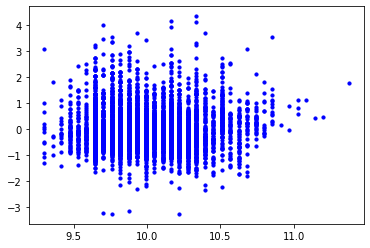

In [124]:
plt.scatter(mod1.predict(mod1_X_test), mod1.predict(mod1_X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

In [125]:
# predicción en train
mod1_y_train_pred = mod1.predict(mod1_X_train)

# predicción en test
mod1_y_test_pred = mod1.predict(mod1_X_test)

In [126]:
mod1_mse_train = mean_squared_error(y_train, mod1_y_train_pred)
mod1_mse_train

0.4840089924851105

In [127]:
mod1_mse_test = mean_squared_error(y_test, mod1_y_test_pred)
mod1_mse_test

0.4834283901748652

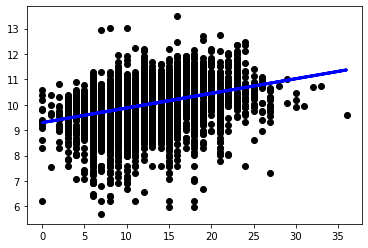

In [70]:
# Plot outputs
plt.scatter(mod1_X_test, y_test, color="black")
plt.plot(mod1_X_test, mod1_y_test_pred, color="blue", linewidth=3)

### Modelo 2

Regresión polinómica (generalización del modelo lineal simple). Utilizamos una función ad-hoc para crear el polinomio, descartando el intercepto (columna de valor 1), ya que lo trae por defecto reg.fit. 

In [128]:
# train the model using training sets
mod2_X_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train[['anios_educ']])
mod2_X_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test[['anios_educ']])

mod2 = reg.fit(mod2_X_train, y_train)

In [129]:
# regression coefficients
print('Coefficients: ', mod2.coef_)
print('Intercept: ', mod2.intercept_ )

Coefficients:  [ 0.1030542  -0.00177063]
Intercept:  9.047575482410256


In [130]:
# Coefficient of determination (R2)
mod2.score(mod2_X_test, y_test)

0.12662130652113834

In [131]:
# predicción en train
mod2_y_train_pred = mod2.predict(mod2_X_train)

# predicción en test
mod2_y_test_pred = mod2.predict(mod2_X_test)

In [132]:
mod2_mse_train = mean_squared_error(y_train, mod2_y_train_pred)
mod2_mse_train

0.48144452821673117

In [133]:
mod2_mse_test = mean_squared_error(y_test, mod2_y_test_pred)
mod2_mse_test

0.48159394789037363

* **Tarea 2.4: realizar al menos tres derivaciones del modelo 2 (2.a, 2.b, 2.c) cada una con mayor grado en el polinomio. Analizar los resultados y conclusiones, considerando particularmente la evidencia acerca del problema del sobreajuste***
    - Respuesta 2.4: insertar celdas a continuación
    - **Nota: puede ser seleccionada otra variable para realizar la regresión polinómica, con miras a un mejor desempeño**

### Modelo 3

                            OLS Regression Results                            
Dep. Variable:             l_ysos_dep   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     2969.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:29:11   Log-Likelihood:                -27581.
No. Observations:               29908   AIC:                         5.517e+04
Df Residuals:                   29902   BIC:                         5.522e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

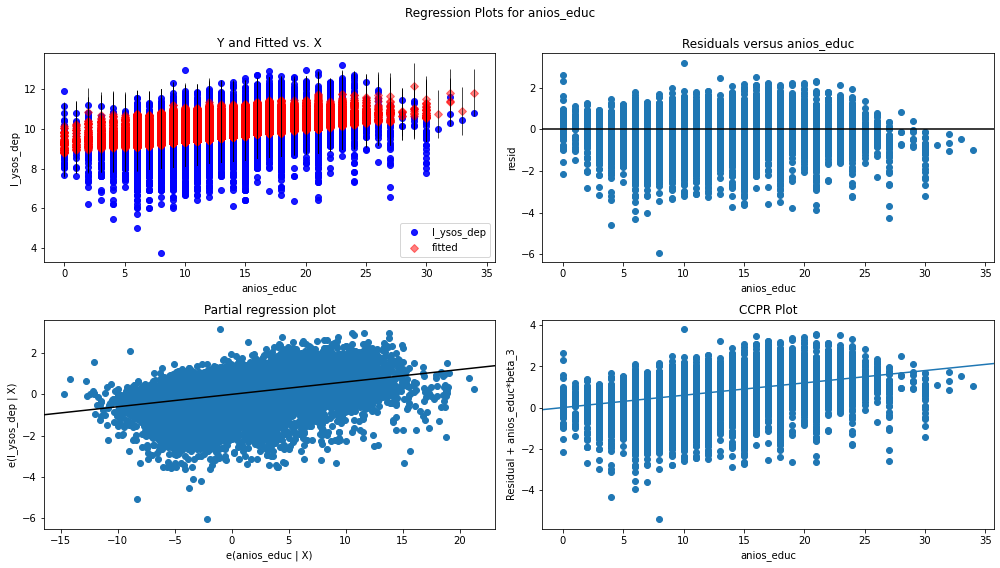

In [134]:
#define response variable
mod3_y_train = y_train
mod3_y_test = y_test

#define predictor variables
mod3_X_train = X_train
mod3_X_test = X_test

#add constant to predictor variables
mod3_X_train = sm.add_constant(mod3_X_train)
mod3_X_test = sm.add_constant(mod3_X_test)

#fit linear regression model
mod3 = sm.OLS(mod3_y_train, mod3_X_train).fit()

#view model summary
print(mod3.summary())

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod3,
                                    'anios_educ',
                                    fig=fig)

In [135]:
# predicción en train
mod3_y_train_pred = mod3.predict(mod3_X_train)

# predicción en test
mod3_y_test_pred = mod3.predict(mod3_X_test)

In [136]:
mod3_mse_train = mean_squared_error(mod3_y_train, mod3_y_train_pred)
mod3_mse_train

0.3702760646178663

In [146]:
mod3_mse_test = mean_squared_error(mod3_y_test, mod3_y_test_pred)
mod3_mse_test

0.3736517352939237

* **Tarea 2.5: Incorporar más variables. Analizar los resultados y conclusiones, considerando particularmente la evidencia acerca del problema del sobreajuste**
    - Respuesta 2.5: conviene hacerlo desde el principio (preparación de los datos)